In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set your image directory path
data_dir = "C:/Users/navee/Projects/Brain AI Project/Datasets/FERPLUS/train"

# Define image dimensions (adjust as needed)
img_width, img_height = 100, 100

# Validation split (adjust the value as needed)
validation_split = 0.2  # 20% of data for validation

# Add batch size
batch_size = 32

# Create training and validation data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split,
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,  # Adjust batch size as needed
    class_mode="categorical",
    subset="training",
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,  # Adjust batch size as needed
    class_mode="categorical",
    subset="validation",
)

Found 55414 images belonging to 7 classes.
Found 13849 images belonging to 7 classes.


In [2]:
from keras.applications import VGG16

# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classifier on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                294976    
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 15010119 (57.26 MB)
Trainable params: 295431 (1.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [3]:

# Train the model (adjust epochs as needed)
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

# Save the model (optional)
model.save("FERPLUS_VGG_MODEL.h5")  # Replace with your desired filename

Epoch 1/10
1732/1732 [==============================] - 979s 565ms/step - loss: 1.2490 - accuracy: 0.5317 - val_loss: 1.2144 - val_accuracy: 0.5555
Epoch 2/10
1732/1732 [==============================] - 951s 549ms/step - loss: 1.0632 - accuracy: 0.6025 - val_loss: 1.0598 - val_accuracy: 0.6211
Epoch 3/10
1732/1732 [==============================] - 961s 555ms/step - loss: 0.9852 - accuracy: 0.6342 - val_loss: 1.0636 - val_accuracy: 0.6231
Epoch 4/10
1732/1732 [==============================] - 958s 553ms/step - loss: 0.9404 - accuracy: 0.6506 - val_loss: 1.0888 - val_accuracy: 0.6195
Epoch 5/10
1732/1732 [==============================] - 945s 546ms/step - loss: 0.9024 - accuracy: 0.6642 - val_loss: 1.0474 - val_accuracy: 0.6299
Epoch 6/10
1732/1732 [==============================] - 943s 545ms/step - loss: 0.8734 - accuracy: 0.6743 - val_loss: 0.9954 - val_accuracy: 0.6465
Epoch 7/10
1732/1732 [==============================] - 958s 553ms/step - loss: 0.8516 - accuracy: 0.6823 - val_

c:\Users\navee\Projects\Brain AI Project\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
# Example training history
history = model.history

# Access training and validation loss/accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


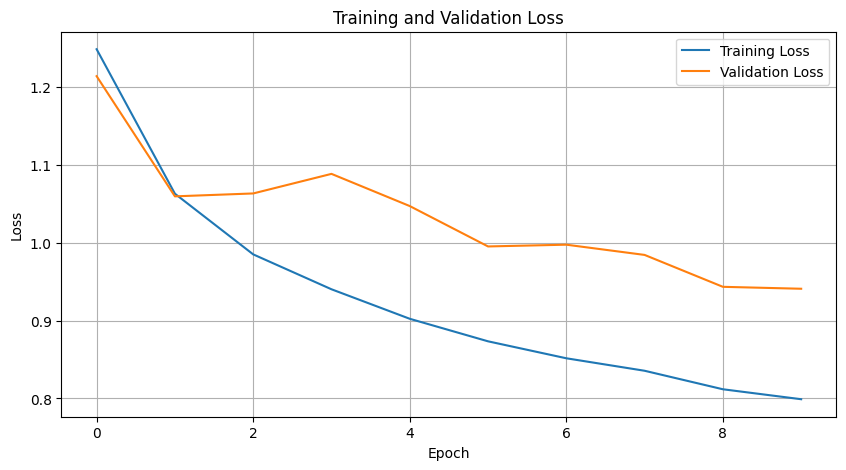

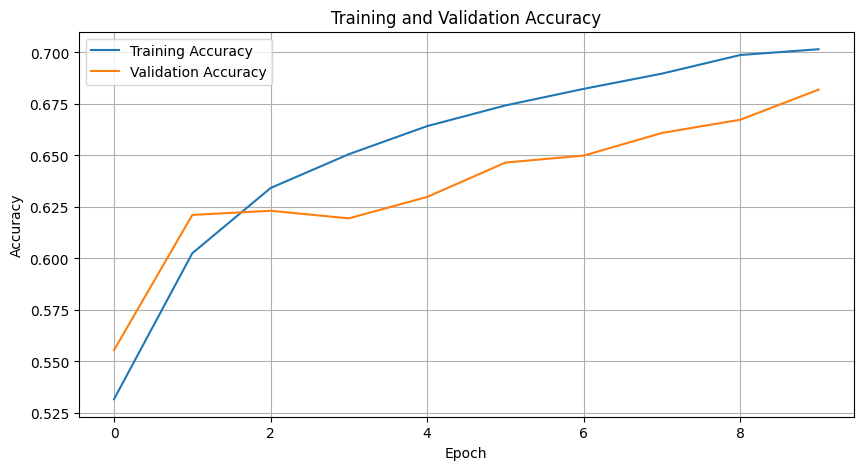

In [5]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


433/433 [==============================] - 164s 378ms/step


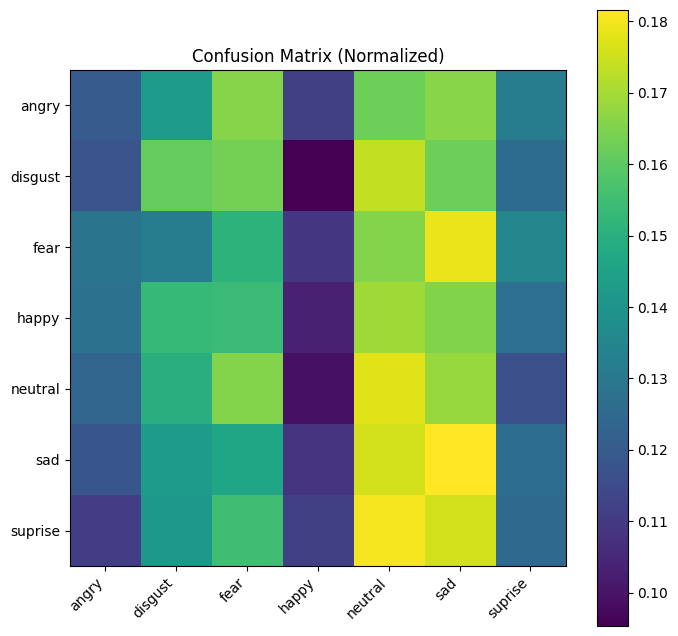

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on validation data (modify as needed)
predicted_labels = np.argmax(model.predict(validation_generator), axis=1)  # Replace with appropriate prediction method
true_labels = validation_generator.classes

# Create confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Normalize for better visualization (optional)
confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Create heatmap
plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix_normalized)
plt.colorbar()

# Add labels and title
class_labels = train_generator.class_indices.keys()
plt.xticks(range(len(class_labels)), class_labels, rotation=45, ha='right')
plt.yticks(range(len(class_labels)), class_labels)
plt.title('Confusion Matrix (Normalized)')
plt.grid(False)
plt.show()


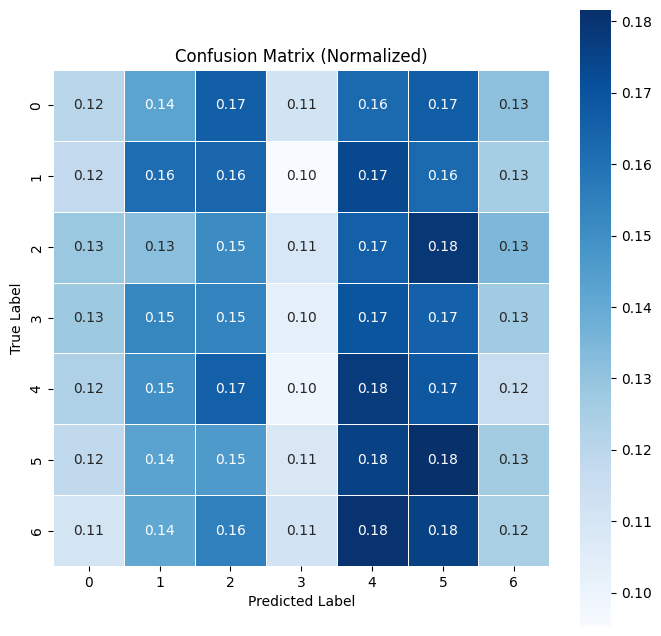

In [7]:
import seaborn as sns

# Create Seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix_normalized, cmap='Blues', annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


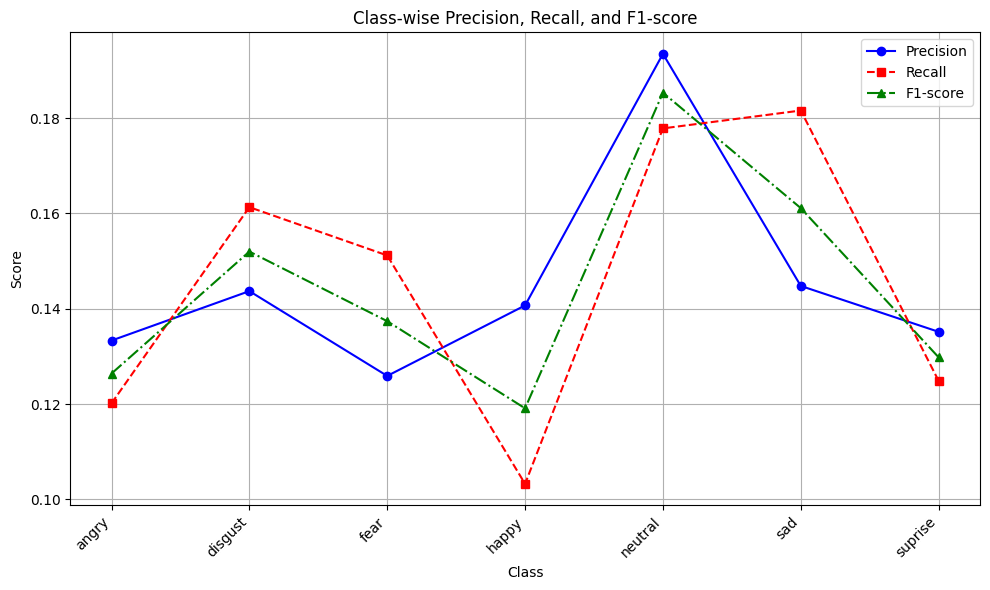

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(true_labels, predicted_labels, average=None)
recall_per_class = recall_score(true_labels, predicted_labels, average=None)
f1_per_class = f1_score(true_labels, predicted_labels, average=None)

# Plot precision, recall, and F1-score together for each class
plt.figure(figsize=(10, 6))

# Plot Precision
plt.plot(
    class_labels,
    precision_per_class,
    marker="o",
    linestyle="-",
    color="b",
    label="Precision",
)

# Plot Recall
plt.plot(
    class_labels,
    recall_per_class,
    marker="s",
    linestyle="--",
    color="r",
    label="Recall",
)

# Plot F1-score
plt.plot(
    class_labels, f1_per_class, marker="^", linestyle="-.", color="g", label="F1-score"
)

plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Class-wise Precision, Recall, and F1-score")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()